# Metehan Ayhan - Generation and Age Estimation Project

Bu projenin amacı, çevrimiçi flört platformu OKCupid'deki kullanıcı profilleri üzerinden, denetimli makine öğrenmesi teknikleri kullanarak, bir kişinin yaşını ve hangi nesile (Millennial, Gen X-er, Boomer) ait olduğunu tahmin etmektir.

<img src='Generation.png' width='300'>

### Data Dictionary
- age: Kullanıcının yaşı
- body_type: Kullanıcının beden tipi 
- diet: Kullanıcının diyet tercihleri 
- drinks: Kullanıcının alkol tüketme sıklığı 
- drugs: Kullanıcının uyuşturucu kullanma durumu
- education: Kullanıcının eğitim durumu 
- essay0-9: Kullanıcının profilinde yazdığı yazı
- ethnicity: Kullanıcının etnik kökeni 
- height: Kullanıcının boyu 
- income: Kullanıcının yıllık geliri 
- job: Kullanıcının mesleği
- last_online: Kullanıcının son çevrimiçi olduğu tarih ve saat 
- location: Kullanıcının yaşadığı şehir ve eyalet 
- offspring: Kullanıcının çocuk sahibi olma durumu 
- orientation: Kullanıcının cinsel yönelimi 
- pets: Kullanıcının evcil hayvanları hakkında bilgisi
- religion: Kullanıcının dini inançları 
- sex: Kullanıcının cinsiyeti
- sign: Kullanıcının burcu 
- smokes: Kullanıcının sigara içme sıklığı 
- speaks: Kullanıcının konuştuğu diller 
- status: Kullanıcının ilişki durumu 

### Import Packet

In [6]:
import pandas as pd
pd.set_option("display.max_columns",250)
pd.set_option('display.max_rows', 250)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix


import warnings
warnings.filterwarnings('ignore')

### Import Data

In [8]:
df=pd.read_csv('profiles.csv')

In [9]:
df.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


### EDA - Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [12]:
df.shape

(60552, 31)

In [13]:
df.describe()

,age,height,income
count,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155
std,9.445488,3.905229,91428.807808
min,18.000000,36.000000,-1.000000
25%,25.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,36.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [14]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [15]:
#Çok fazla eksik değer var.

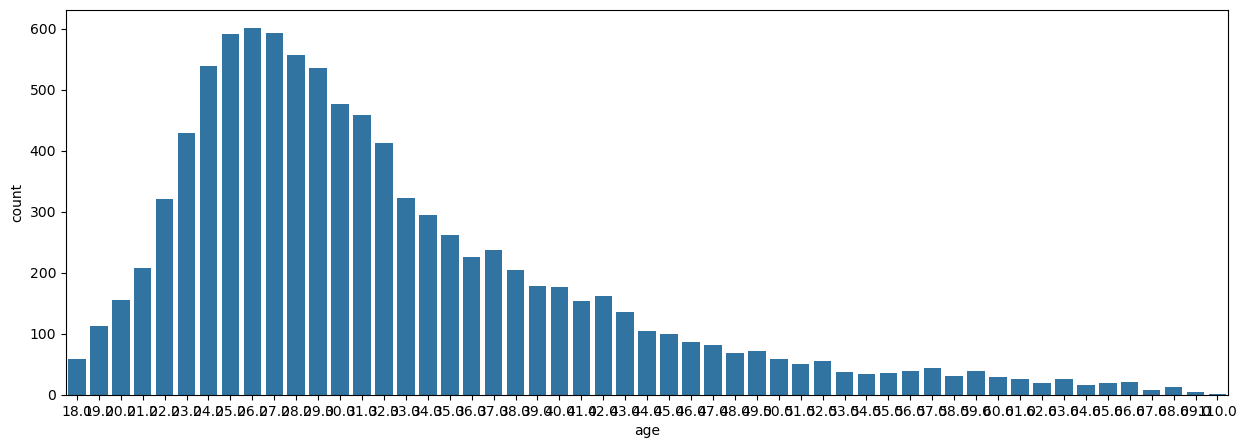

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df["age"]);

### Missing Data

In [18]:
bos_veri = df[df.isna().all(axis=1)]

In [19]:
bos_veri

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# 51K Satırın tamamı boş verilerden oluşuyor öncelikle bunları silelim.

In [21]:
df = df.dropna(how='all')

In [22]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
essay0          847
essay1         1167
essay2         1465
essay3         1824
essay4         1635
essay5         1700
essay6         2162
essay7         1961
essay8         3153
essay9         1960
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

### Feature Engineers

In [24]:
# Önce tüm yazıları birleştirip tek çatı altında toplayalım. Böylece eksik veri kalmamış olacak..

In [25]:
essay_columns = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
df = df.drop(columns=essay_columns)

In [26]:
# Çok fazla kategori var bunları bir kaç çatı altında toplayalım.

In [27]:
skinnystatus={"average":"fit",    
              "fit":"fit",
              "athletic":"fit",
              "thin":"fit",
              "curvy":"curvy",
              "a little extra":"curvy",
              "skinny":"fit",
              "full figured":"curvy",
              "overweight":"bad",
              "jacked":"bad",
              "used up":"bad",
              "rather not say":"curvy"
             }
df.body_type.replace(skinnystatus,inplace=True)       

In [28]:
df['diet'].unique()

array(['strictly anything', 'mostly other', 'anything', 'vegetarian', nan,
       'mostly anything', 'mostly vegetarian', 'strictly vegan',
       'strictly vegetarian', 'mostly vegan', 'strictly other',
       'mostly halal', 'other', 'vegan', 'mostly kosher',
       'strictly halal', 'halal', 'strictly kosher', 'kosher'],
      dtype=object)

In [29]:
df['diet'] = df['diet'].replace({
    'strictly anything': 'Anything',
    'mostly anything': 'Anything',
    'anything': 'Anything',
    'strictly vegan': 'Vegan',
    'mostly vegan': 'Vegan',
    'vegan': 'Vegan',
    'strictly vegetarian': 'Vegetarian',
    'mostly vegetarian': 'Vegetarian',
    'vegetarian': 'Vegetarian',
    'strictly other': 'Other',
    'mostly other': 'Other',
    'other': 'Other',
    'strictly halal': 'Halal',
    'mostly halal': 'Halal',
    'halal': 'Halal',
    'strictly kosher': 'Kosher',
    'mostly kosher': 'Kosher',
    'kosher': 'Kosher'
})

In [30]:
df['education'].unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       nan, 'graduated from high school', 'working on masters program',
       'graduated from space camp', 'college/university',
       'dropped out of space camp', 'graduated from ph.d program',
       'graduated from law school', 'working on ph.d program',
       'two-year college', 'graduated from two-year college',
       'working on med school', 'dropped out of college/university',
       'space camp', 'graduated from med school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school'], dtype=object)

In [31]:
df['education'] = df['education'].replace({
    'working on college/university': 'Working on Education',
    'working on space camp': 'Working on Education',
    'graduated from masters program': 'Graduated',
    'graduated from college/university': 'Graduated',
    'working on two-year college': 'Working on Education',
    'graduated from high school': 'Graduated',
    'working on masters program': 'Working on Education',
    'graduated from space camp': 'Graduated',
    'college/university': 'Graduated',
    'dropped out of space camp': 'Dropped out of Education',
    'graduated from ph.d program': 'Graduated',
    'graduated from law school': 'Graduated',
    'working on ph.d program': 'Working on Education',
    'two-year college': 'Graduated',
    'graduated from two-year college': 'Graduated',
    'working on med school': 'Working on Education',
    'dropped out of college/university': 'Dropped out of Education',
    'space camp': 'Graduated',
    'graduated from med school': 'Graduated',
    'dropped out of high school': 'Dropped out of Education',
    'working on high school': 'Working on Education',
    'masters program': 'Graduated',
    'dropped out of ph.d program': 'Dropped out of Education',
    'dropped out of two-year college': 'Dropped out of Education',
    'dropped out of med school': 'Dropped out of Education',
    'high school': 'Graduated',
    'working on law school': 'Working on Education',
    'law school': 'Graduated',
    'dropped out of masters program': 'Dropped out of Education',
    'ph.d program': 'Graduated',
    'dropped out of law school': 'Dropped out of Education'
})

In [32]:
df['drinks'] = df['drinks'].replace({
    'socially': 'Moderate',
    'often': 'Frequent',
    'not at all': 'Never',
    'rarely': 'Rarely',
    'very often': 'Frequent',
    'desperately': 'Frequent'
})

In [33]:
df['job'].unique()

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [34]:
df['job'] = df['job'].replace({ 
    'transportation': 'Other',
    'hospitality / travel': 'Other',
    'student': 'Other',
    'artistic / musical / writer': 'Artistic',
    'computer / hardware / software': 'Technology',
    'banking / financial / real estate': 'Finance',
    'entertainment / media': 'Media',
    'sales / marketing / biz dev': 'Sales',
    'other': 'Other',
    'medicine / health': 'Health',
    'science / tech / engineering': 'Science',
    'executive / management': 'Management',
    'education / academia': 'Education',
    'clerical / administrative': 'Administration',
    'construction / craftsmanship': 'Construction',
    'rather not say': 'Other',
    'political / government': 'Government',
    'law / legal services': 'Law',
    'unemployed': 'Other',
    'military': 'Other',
    'retired': 'Other'})

In [35]:
df['age']=df['age'].astype(int)

generation = []
for i in range(len(df)):
    if 17 < int(df["age"].iloc[i]) < 33:
        generation.append("Millennial")
    elif 32 < int(df["age"].iloc[i]) < 48:
        generation.append("Gen X-er")
    else:
        generation.append("Boomer")
df["generation"] = generation

In [36]:
df['kid'] = df['offspring'].str.contains('has', na=False).astype(int)

In [37]:
df=df[['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'income', 'job',
       'sex', 'smokes', 'status','kid','generation']]

In [38]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [39]:
df.loc[df['income'] == -1.0 , 'income'] = 0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9513
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         9514 non-null   int32  
 1   body_type   9514 non-null   object 
 2   diet        9514 non-null   object 
 3   drinks      9514 non-null   object 
 4   drugs       9514 non-null   object 
 5   education   9514 non-null   object 
 6   height      9514 non-null   float64
 7   income      9514 non-null   float64
 8   job         9514 non-null   object 
 9   sex         9514 non-null   object 
 10  smokes      9514 non-null   object 
 11  status      9514 non-null   object 
 12  kid         9514 non-null   int32  
 13  generation  9514 non-null   object 
dtypes: float64(2), int32(2), object(10)
memory usage: 1.0+ MB


In [41]:
df.head()

,age,body_type,diet,drinks,drugs,education,height,income,job,sex,smokes,status,kid,generation
0,22,curvy,Anything,Moderate,never,Working on Education,75.0,0.0,Other,m,sometimes,single,0,Millennial
1,35,fit,Other,Frequent,sometimes,Working on Education,70.0,80000.0,Other,m,no,single,0,Gen X-er
2,38,fit,Anything,Moderate,never,Graduated,68.0,0.0,Other,m,no,available,0,Gen X-er
3,23,fit,Vegetarian,Moderate,never,Working on Education,71.0,20000.0,Other,m,no,single,0,Millennial
4,29,fit,Anything,Moderate,never,Graduated,66.0,0.0,Artistic,m,no,single,0,Millennial


### Modelling (For Age)

In [43]:
x = df.drop(['age'], axis=1)
y = df['age']

In [44]:
x=pd.get_dummies(data=x,drop_first=True)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) 

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
L=LinearRegression()

In [48]:
L.fit(x_train,y_train)

LinearRegression()

In [49]:
tahmin=L.predict(x_test)

In [50]:
r2_score(y_test,tahmin)

0.8540874746943116

### Modelling (For Generation)

In [52]:
x_c= df.drop(['generation'], axis=1)
y_c=df[['generation']]

In [53]:
x_c=pd.get_dummies(data=x,drop_first=True)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x_c,y_c,random_state=42,test_size=0.20)

In [55]:
lr=LogisticRegression()

In [56]:
model=lr.fit(x_train,y_train)

In [57]:
pred=model.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
conf_matrix = confusion_matrix(y_test, pred, labels=['Millennial', 'Gen X-er', 'Boomer'])

In [60]:
accuracy_score(y_test,pred)

0.999474513925381

In [61]:
precision_score(y_test,pred, average='weighted')

0.9994749435951067

In [62]:
recall_score(y_test,pred, average='weighted')

0.999474513925381

In [63]:
f1_score(y_test,pred, average='weighted')

0.9994737307323822

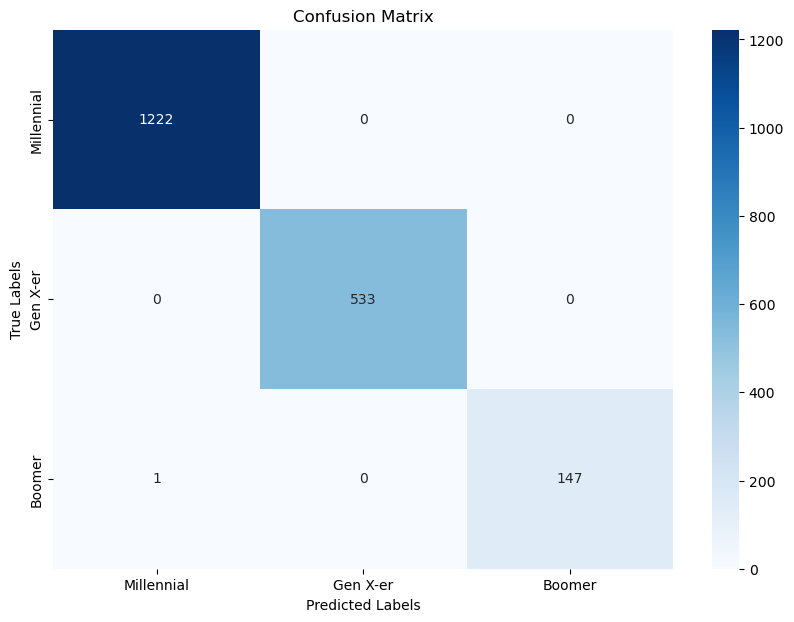

In [64]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Millennial', 'Gen X-er', 'Boomer'],
            yticklabels=['Millennial', 'Gen X-er', 'Boomer'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Result

Kullanıcıların yaşını %85 doğru tahmin eden bir regression modeli ve ait olduğu jenerasyonu %99 doğru tahmin eden classification modeli geliştirildi.